<a href="https://colab.research.google.com/github/Churabros/Moringa_phase2_project/blob/main/Phase_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 Project
##Group Members


1.   Yusuf Ali
2.   Winny Chepkoech
3.   Festus Muchemi
4.   Krop Leonard





![pandas](https://img.freepik.com/free-vector/online-cinema-banner-with-open-clapper-board-film-strip_1419-2242.jpg)

# overview
In the evolving landscape of the entertainment industry, major companies are increasingly investing in original video content to capture audience attention and secure market share. Following this trend, our company has decided to venture into the movie production business by establishing a new movie studio. However, given our lack of experience in this domain, it is crucial to understand the current dynamics of the box office to make informed decisions about the types of films to produce. This analysis will help our company’s new movie studio to strategically plan and create films that are more likely to perform well at the box office, thereby ensuring a competitive edge in the market.



# Business understanding
The film industry is a highly competitive and dynamic sector, where the success of a movie depends on various factors, including genre, budget, runtime,  and release timing. By analyzing these factors, we can gain insights into what makes a movie successful and use this knowledge to guide our production choices. Understanding the preferences and behaviors of moviegoers, as well as the strategies employed by successful films, will be critical in shaping our studio's content creation strategy.



#Objectives  
1.	Identify leading movie genres in terms of gross sales to determine which consistently produce high-performing films.
2.	Compare production costs to revenue to identify optimal investment strategies for maximizing return on investment.
3.	Analyze movie ratings and audience preferences to understand what elements contribute to higher viewer satisfaction.
4.	Predict the best movie genres that return highest profit to the firm.


#Data Understanding
The Data that was used for this analysis will be pulled from Three Diffrent sources

`tn.movie_budgets.csv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank

`tmdb.movies.csv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank

`rt.movie_info.tsv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank



**Inserting Relevant Libraries to help in analysing the data**

We begin by importing the necessary libraries for data manipulation, analysis, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')

**Import Relevant Libraries That will be used in the analysis**

In this step, we are importing the datasets required for our analysis. These datasets include movie budgets, movie details from TMDB, box office gross revenues, Rotten Tomatoes reviews, and movie information. We will also establish a connection to an SQLite database where some of our data may be stored.

The datasets are:
- `df_budget`: Contains movie budget information.
- `df_tmdf`: Contains movie details from TMDB.
- `df_gross`: Contains box office gross revenue information.
- `df_rev`: Contains Rotten Tomatoes reviews.
- `df_info`: Contains movie information from Rotten Tomatoes.


In [ ]:
#Imported Datasets
df_budget = pd.read_csv('/content/tn.movie_budgets.csv.gz')
df_tmdf = pd.read_csv('/content/tmdb.movies.csv.gz')
df_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
df_rev = pd.read_csv('/content/rt.reviews.tsv.gz', sep='\t', encoding='latin1') # Try using 'latin1' encoding
df_info = pd.read_csv('/content/rt.movie_info.tsv.gz', sep='\t')
path = '/content/im.db'
conn = sqlite3.connect(path)

We will use these datasets to perform our analysis and gain insights into the factors that contribute to a movie's success.

#Data Exploration

We begin our data exploration by examining the first few rows of the `df_info` dataset, which contains movie information from Rotten Tomatoes. This step helps us understand the structure of the dataset and the type of information it holds. By inspecting the initial rows, we can identify the columns available and check for any potential issues with the data.

In [ ]:
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Next, we explore the `df_budget` dataset. This dataset contains information about the budgets of various movies. By examining these initial rows, we can gain insight into the types of budget-related data it contains, and begin to assess the quality and completeness of the data.

In [ ]:
# Yusuf Ali
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We now examine the `df_budget` dataset's structure and data types using the `.info()` method. This method provides a concise summary of the DataFrame, including the number of non-null entries, column names, and data types. This information is essential for understanding the dataset's composition and identifying any potential data cleaning needs.

In [ ]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Next, we explore the `df_tmdf` dataset by displaying the first few rows. This dataset contains detailed information about movies from The Movie Database (TMDB). We can understand the structure of the dataset, the types of movie-related data it includes, and start to evaluate the quality and relevance of the information for our analysis.

In [ ]:
# Yusuf Ali
df_tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
df_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


We continue our data exploration by examining the first few rows of the `df_gross` dataset. This dataset contains information about the box office gross revenues of various movies. By looking at these initial rows, we can understand the structure of the dataset, the types of revenue-related data it includes, and assess its quality and completeness for our analysis.

In [ ]:
# Yusuf Ali
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Yusuf Ali
df_imdb = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,movie_akas,movie_akas,3,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
2,table,movie_ratings,movie_ratings,4,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [ ]:
#Yusuf Ali
query = """ SELECT *
            FROM movie_ratings rat
            JOIN  movie_akas ak
            ON rat.movie_id = ak.movie_id
            JOIN movie_basics mb
            ON ak.movie_id = mb.movie_id """
df_imdb = pd.read_sql(query,conn)


In [ ]:
print(type(df_imdb))

<class 'pandas.core.frame.DataFrame'>


Dropping irrelevant columns in imdb dataset

We are now focusing on cleaning the `df_imdb` dataset by removing any duplicate columns and selecting only the relevant columns for our analysis.

In [ ]:
#Yusuf Ali
columns_to_keep = [ 'averagerating', 'numvotes', 'title', 'region', 'start_year', 'runtime_minutes', 'genres']
df_imdb = df_imdb.loc[:,~df_imdb.columns.duplicated()]
df_cleaned = df_imdb[columns_to_keep]
df_cleaned.head()

,averagerating,numvotes,title,region,start_year,runtime_minutes,genres
0,6.4,20,Just Inès,None,2010,90.0,Drama
1,6.4,20,Samo Ines,RS,2010,90.0,Drama
2,6.4,20,Just Inès,GB,2010,90.0,Drama
3,4.2,50352,Legenda lui Hercule,RO,2014,99.0,"Action,Adventure,Fantasy"
4,4.2,50352,La légende d'Hercule,FR,2014,99.0,"Action,Adventure,Fantasy"


By displaying the first few rows of the cleaned dataset, we can verify that the correct columns have been retained and that the data is ready for further analysis.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averagerating    261806 non-null  float64
 1   numvotes         261806 non-null  int64  
 2   title            261806 non-null  object 
 3   region           218341 non-null  object 
 4   start_year       261806 non-null  int64  
 5   runtime_minutes  250553 non-null  float64
 6   genres           260621 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.0+ MB


### Merging Datasets

In this step, we are merging multiple datasets to create a comprehensive DataFrame for analysis. The merging process involves:

1. **Merging `df_budget` with `df_cleaned`:** The `df_budget` dataset is merged with `df_cleaned` on the `title` column to combine budget information with movie details.
2. **Merging the result with `df_tmdf`:** The previously merged DataFrame is then merged with `df_tmdf` on the `title` column to include additional movie details from TMDB.

In [ ]:
#Yusuf Ali
# Merging datasets
merged_df = df_budget.merge(df_cleaned, left_on='movie', right_on='title', how='left')
merged_df = merged_df.merge(df_tmdf, left_on='movie', right_on='title', how='left')
merged_df.head()


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,title_x,region,...,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,Avatar,XWW,...,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,US,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,None,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,CA,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
4,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,Dark Phoenix,BD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are now examining the dimensions of the merged dataset by checking the number of rows and columns. This step provides an overview of the dataset's size before we proceed with any data cleaning or preprocessing. By understanding the dataset's shape, we can better plan the necessary cleaning steps and transformations.

In [ ]:
#Finding out how many rows and columns there are in the final dataset before cleaning
merged_df.shape
print("Number of rows: ", merged_df.shape[0])
print("Number of Columns: ", merged_df.shape[1])

Number of rows:  16096
Number of Columns:  23


# Data Cleaning

Data cleaning is a crucial step in the data analysis process, aimed at ensuring that the dataset is accurate, consistent, and usable. It involves identifying and addressing issues such as missing values, duplicate entries, incorrect data types, and inconsistencies. Proper data cleaning enhances the quality of the data and ensures that the subsequent analysis is reliable and meaningful.

### Dropping Columns

In this step, we are refining the merged dataset by performing two key tasks:

1. **Dropping Unnecessary Columns:** We remove columns that are not relevant to our analysis or contain redundant information.

2. **Renaming Columns:** We rename certain columns to make them more descriptive and easier to interpret.

In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'title_x', 'title_y', 'id_y', 'id_x',
    'original_title', 'genre_ids', 'start_year',
    'vote_count', 'vote_average', 'release_date_y'
]
merged_df = merged_df.drop(columns=columns_to_drop)

# Rename columns to be more descriptive
merged_df = merged_df.rename(columns={
    'movie': 'title',  # Assuming 'movie' is the main title column
    'release_date_x': 'budget_release_date',
    'production_budget': 'budget',
    'domestic_gross': 'domestic_gross',
    'worldwide_gross': 'worldwide_gross',
    'averagerating': 'average_rating',
    'numvotes': 'num_votes',
    'region': 'region',
    'language': 'language',
    'runtime_minutes': 'runtime_minutes',
    'genres': 'genres',
    'original_language': 'original_language',
    'popularity': 'popularity'
})



The above columns were dropped since they contain infromation that is irrelevant, redundant or unnecessary not needed in the analysis process

### Handeling Duplicates

We now address duplicate entries in the dataset to ensure each movie is represented only once. We perform the following actions:

1. **Priority Assignment:** A temporary column `'priority'` is created to assign a priority value based on the `'region'` column. Movies from the 'US' region are given a lower priority (0), while others are assigned a higher priority (1).

2. **Dropping Duplicates:** We then drop duplicate rows based on the `'title'` column, keeping only the first occurrence of each title.


In [ ]:
# Remove any duplicate rows
merged_df['priority'] = merged_df['region'].apply(lambda x: 0 if x == 'US' else 1)
merged_df = merged_df.drop(columns='priority')

# Drop duplicates based on the 'title' column, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='title', keep='first')

In [ ]:
merged_df.head()

,budget_release_date,title,budget,domestic_gross,worldwide_gross,average_rating,num_votes,region,runtime_minutes,genres,original_language,popularity
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,XWW,93.0,Horror,en,26.526
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,US,136.0,"Action,Adventure,Fantasy",en,30.579
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,BD,113.0,"Action,Adventure,Sci-Fi",NaN,NaN
8,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",7.3,665594.0,IT,141.0,"Action,Adventure,Sci-Fi",en,44.383
13,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget_release_date  5698 non-null   object 
 1   title                5698 non-null   object 
 2   budget               5698 non-null   object 
 3   domestic_gross       5698 non-null   object 
 4   worldwide_gross      5698 non-null   object 
 5   average_rating       2313 non-null   float64
 6   num_votes            2313 non-null   float64
 7   region               1647 non-null   object 
 8   runtime_minutes      2255 non-null   float64
 9   genres               2311 non-null   object 
 10  original_language    1924 non-null   object 
 11  popularity           1924 non-null   float64
dtypes: float64(4), object(8)
memory usage: 707.7+ KB


## Changing Data types

As seen above the `domestic_gross`, `worldwide_gross` and `budget` columns are strings and need to be change to floats. the `budget_release_date`column needs to be changed to datetime datatype

We focus on cleaning and transforming the specific columns to ensure data consistency and usability:

1. **Cleaning Currency Columns:** We define a function `clean_currency` to convert currency values from string format to float. This function removes dollar signs and commas from the currency values and converts them into numerical format. The function is then applied to the following columns:
   - `'budget'`
   - `'domestic_gross'`
   - `'worldwide_gross'`

2. **Converting Date Columns:** The `'budget_release_date'` column is converted to datetime format using `pd.to_datetime()`. This transformation allows us to perform date-related operations and analyses more effectively.

In [ ]:
# Function to clean currency columns and convert to float
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Applying the function to the relevant columns
merged_df['budget'] = merged_df['budget'].apply(clean_currency)
merged_df['domestic_gross'] = merged_df['domestic_gross'].apply(clean_currency)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].apply(clean_currency)

# Converting budget_release_date to datetime
merged_df['budget_release_date'] = pd.to_datetime(merged_df['budget_release_date'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget_release_date  5698 non-null   datetime64[ns]
 1   title                5698 non-null   object        
 2   budget               5698 non-null   float64       
 3   domestic_gross       5698 non-null   float64       
 4   worldwide_gross      5698 non-null   float64       
 5   average_rating       2313 non-null   float64       
 6   num_votes            2313 non-null   float64       
 7   region               1647 non-null   object        
 8   runtime_minutes      2255 non-null   float64       
 9   genres               2311 non-null   object        
 10  original_language    1924 non-null   object        
 11  popularity           1924 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 707.7+ KB


### Handeling Nulls

We are now evaluating the percentage of missing values in each column of the dataset. The `.isna().mean()*100` method calculates the proportion of missing values as a percentage for each column. This analysis helps us identify columns with significant amounts of missing data, which may require attention and remediation before proceeding with further analysis.

In [ ]:
#finding out the percentage of duplicates each column has
merged_df.isna().mean()*100

budget_release_date     0.000000
title                   0.000000
budget                  0.000000
domestic_gross          0.000000
worldwide_gross         0.000000
average_rating         59.406809
num_votes              59.406809
region                 71.095121
runtime_minutes        60.424710
genres                 59.441909
original_language      66.233766
popularity             66.233766
dtype: float64

As seen above most rows contain null values

Given the significant number of null values in certain columns, we take the following steps to address missing data:

1. **Filling Missing Values in Specific Columns:** For columns with a high percentage of missing values, we fill these null values with the placeholder `'Unknown'`:
   - `'region'`
   - `'genres'`
   - `'original_language'`

2. **Removing Remaining Null Values:** We then remove rows with any remaining null values in the other columns of the dataset.

In [ ]:
#drop region columns since null values is too many

merged_df['region'].fillna('Unknown', inplace=True)
merged_df['genres'].fillna('Unknown', inplace=True)
merged_df['original_language'].fillna('Unknown', inplace=True)

# Remove rows with any null values in the remaining columns
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isna().mean()*100

budget_release_date    0.0
title                  0.0
budget                 0.0
domestic_gross         0.0
worldwide_gross        0.0
average_rating         0.0
num_votes              0.0
region                 0.0
runtime_minutes        0.0
genres                 0.0
original_language      0.0
popularity             0.0
dtype: float64

We should verify that the percentage of missing values is significantly reduced, and ensure that no critical columns are left with excessive missing data.

To ensure the `'runtime_minutes'` column is properly formatted for analysis, we perform the following steps:

1. **Convert to Numeric:** We convert the `'runtime_minutes'` column to numeric format using `pd.to_numeric()`, with the `errors='coerce'` parameter to handle any non-numeric values by converting them to `NaN`.

2. **Calculate Mean Runtime:** We compute the mean of the `'runtime_minutes'` column, excluding `NaN` values. This provides a reference value to use for filling missing data.

3. **Fill Missing Values:** We fill `NaN` values in the `'runtime_minutes'` column with the calculated mean runtime. This ensures that the dataset is complete and that the runtime information is consistently represented.

In [ ]:
# Convert runtime_minutes to numeric, forcing errors to NaN (in case there are any non-numeric values)
merged_df['runtime_minutes'] = pd.to_numeric(merged_df['runtime_minutes'], errors='coerce')

# Calculate the mean of runtime_minutes, excluding NaNs
mean_runtime = merged_df['runtime_minutes'].mean()

# Fill NaNs in runtime_minutes with the mean
merged_df['runtime_minutes'].fillna(mean_runtime, inplace=True)

In [ ]:
merged_df.head()

,budget_release_date,title,budget,domestic_gross,worldwide_gross,average_rating,num_votes,region,runtime_minutes,genres,original_language,popularity
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,6.1,43.0,XWW,93.0,Horror,en,26.526
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.6,447624.0,US,136.0,"Action,Adventure,Fantasy",en,30.579
8,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,7.3,665594.0,IT,141.0,"Action,Adventure,Sci-Fi",en,44.383
15,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,8.5,670926.0,AL,149.0,"Action,Adventure,Sci-Fi",en,80.773
29,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,6.5,329135.0,IT,120.0,"Action,Adventure,Fantasy",en,34.953


To facilitate analysis, we categorize the `'runtime_minutes'` column into discrete bins. This step helps in grouping movies into runtime categories, making it easier to analyze patterns and trends related to movie length.

In [ ]:
# Define bins and labels
bins = [0, 90, 100, 120, 140, 160, 180, 200]
labels = ['0-90', '91-100', '101-120', '121-140', '141-160', '161-180', '181-200']

# Create a new column 'runtime_category'
merged_df['runtime_category'] = pd.cut(merged_df['runtime_minutes'], bins=bins, labels=labels, right=False)


# EDA(Exploritary data analysis)

## Univariate Analysis

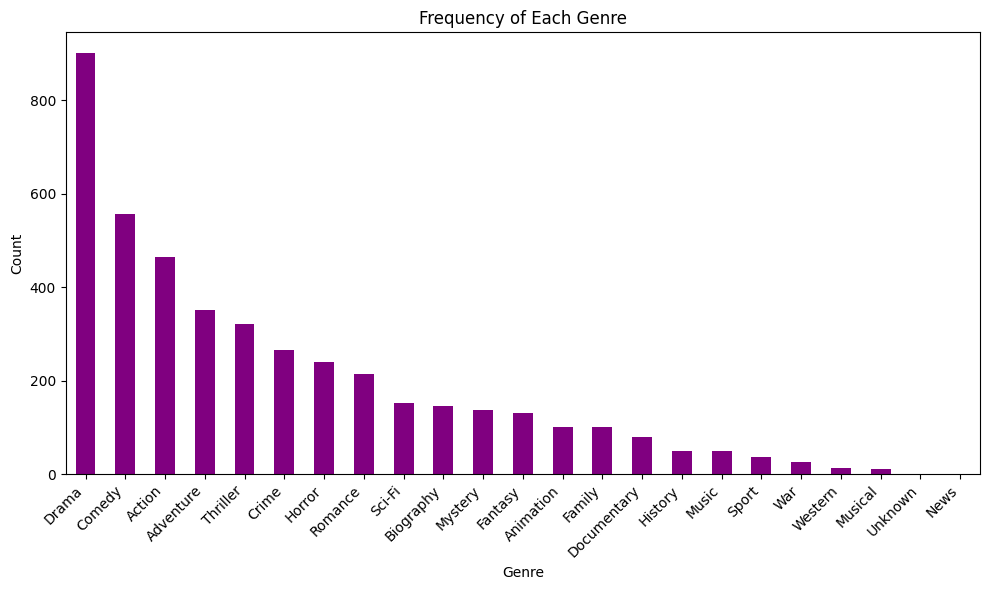

The most frequent genre is 'Drama' with 900 occurrences.


In [ ]:

# Split the 'genres' column and count each genre's frequency
genres_split = merged_df['genres'].str.split(',', expand=True).stack()
genre_counts = genres_split.value_counts()

# Identify the most frequent genre
most_frequent_genre = genre_counts.idxmax()
most_frequent_count = genre_counts.max()

# Plot the frequency of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



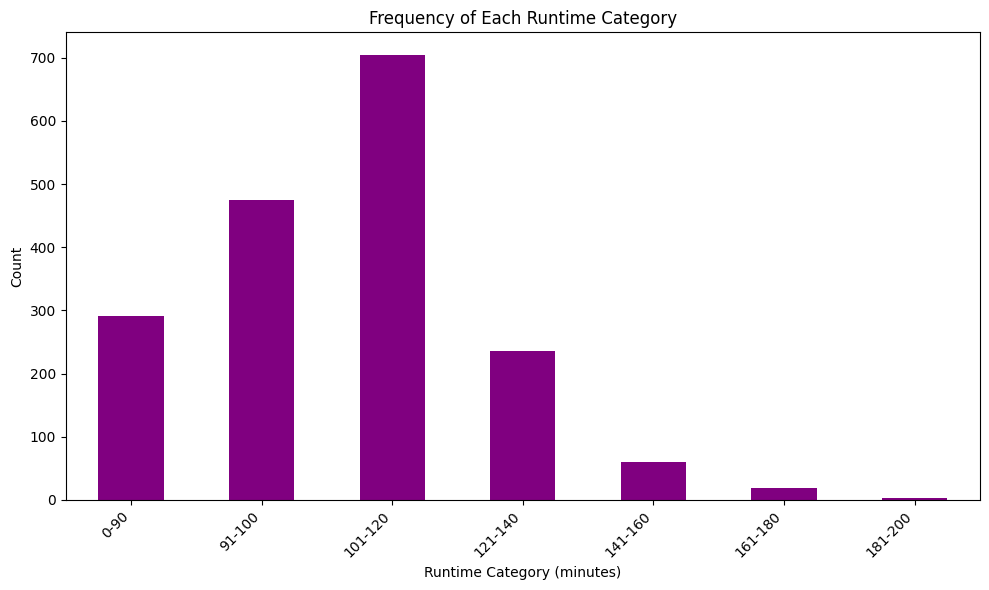

In [ ]:

runtime_category_counts = merged_df['runtime_category'].value_counts().sort_index()

# Plot the frequency of each runtime category
plt.figure(figsize=(10, 6))
runtime_category_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each Runtime Category')
plt.xlabel('Runtime Category (minutes)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



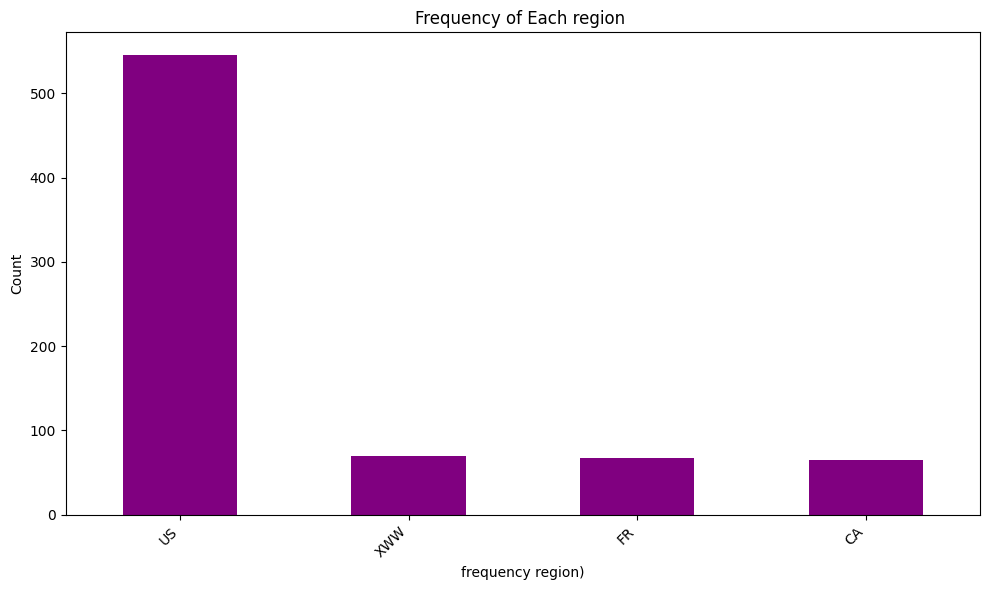

In [156]:


#get the top 5 regins

top_5_regions = merged_df['region'].value_counts().head(5).index

# Filter the DataFrame to exclude unknown regions
filtered_regions_df = merged_df[(merged_df['region'] != 'Unknown')]

region_df = filtered_regions_df[merged_df['region'].isin(top_5_regions)]

# Count the frequency of each region in the filtered DataFrame

region_counts = region_df['region'].value_counts().sort_index().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each region ')
plt.xlabel('frequency region)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Bivariate Analysis

''

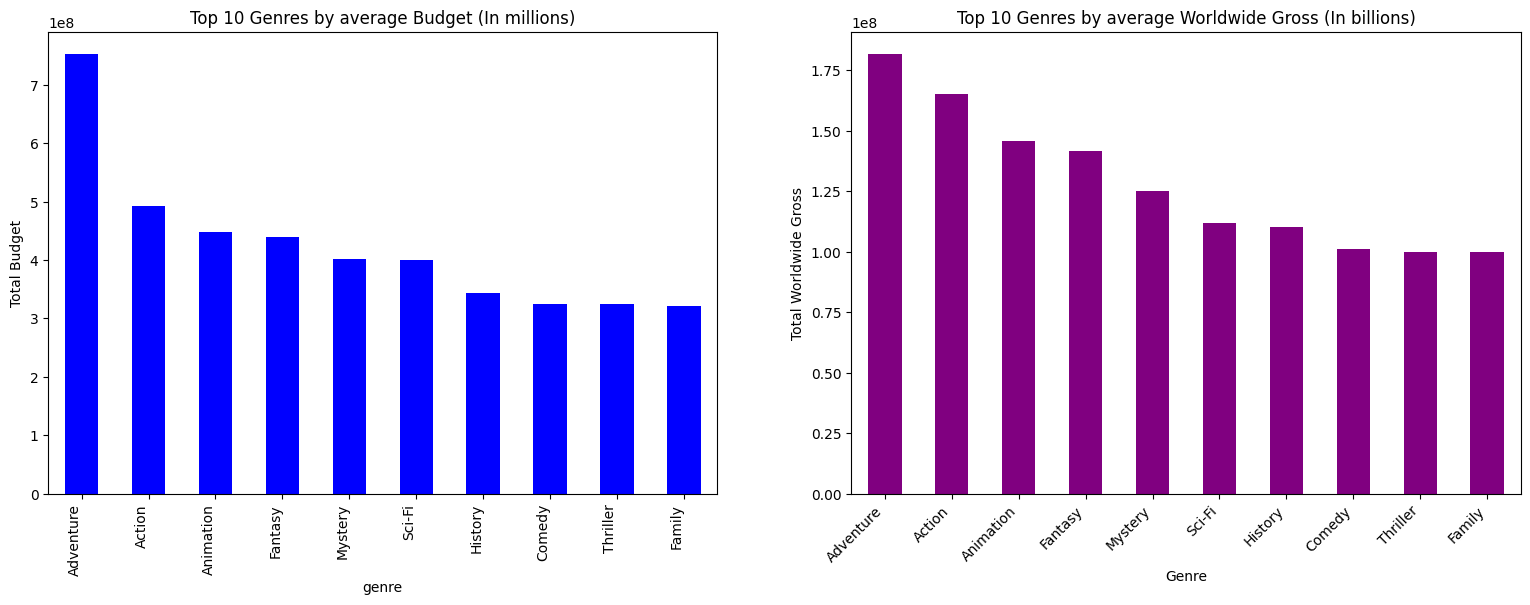

In [174]:
# Split genres and create a new DataFrame with individual genres
genre_split = merged_df['genres'].str.split(',', expand=True).stack().reset_index(drop=True)
genre_df = merged_df.drop(columns='genres').join(genre_split.rename('genre'))

# Aggregate by genre for budget and worldwide gross
genre_budget = genre_df.groupby('genre')['budget'].mean().sort_values(ascending=False)
genre_worldwide_gross = genre_df.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))
#Top 10 Genres by average Budget
genre_budget.head(10).plot(kind='bar', color='purple', ax=ax2)
ax1.set_title('Top 10 Genres by average Budget (In millions)')
ax1.set_xlabel('Genre')
ax1.set_ylabel(' Budget')
ax1.set_xticklabels(genre_budget.head(10).index, rotation=45, ha='right')
#Top 10 Genres by average Worldwide Gross
genre_worldwide_gross.head(10).plot(kind='bar', color='blue', ax=ax1)
ax2.set_title('Top 10 Genres by average Worldwide Gross (In billions)')
ax2.set_xlabel('Genre')
ax2.set_ylabel(' Worldwide Gross')
ax2.set_xticklabels(genre_worldwide_gross.head(10).index, rotation=45, ha='right')


;

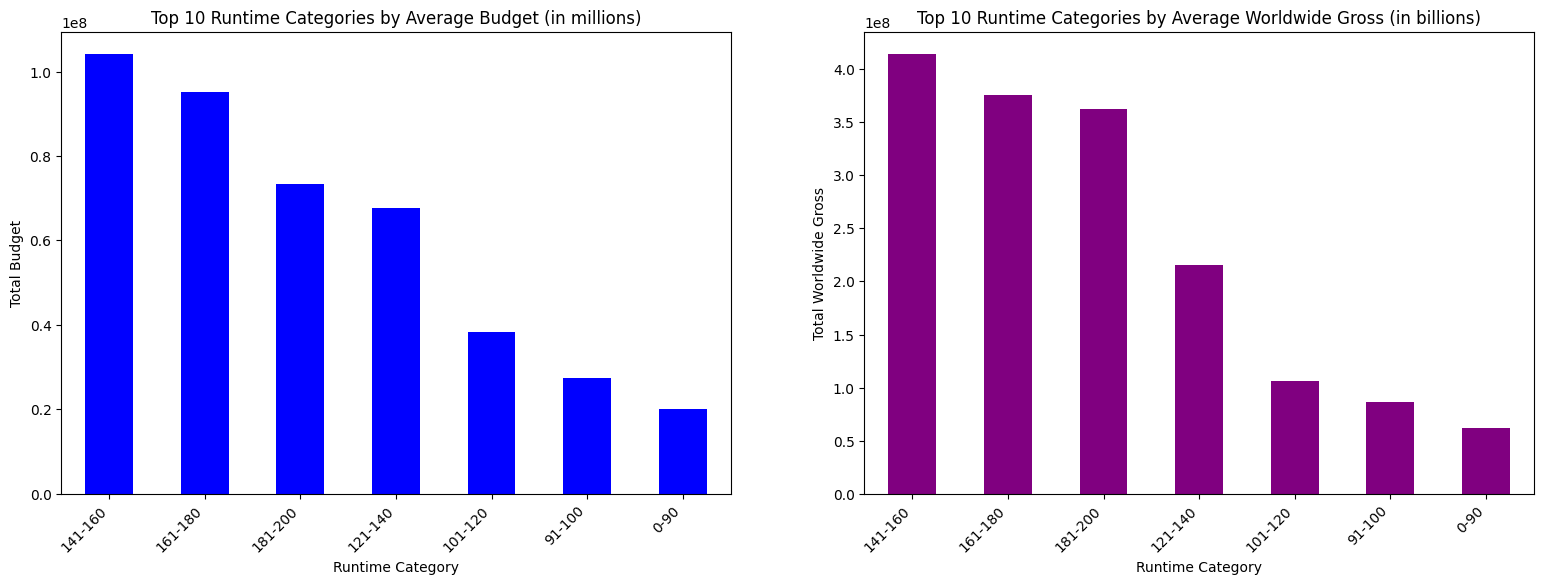

In [175]:
# Get runtime category counts
runtime_category_counts = merged_df['runtime_category'].value_counts().sort_index()

# Aggregate by runtime category for budget
runtime_budget = merged_df.groupby('runtime_category')['budget'].mean().sort_values(ascending=False)

# Aggregate by runtime category for worldwide gross
runtime_worldwide_gross = merged_df.groupby('runtime_category')['worldwide_gross'].mean().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))

#Top 10 Runtime Categories by Average Budget
runtime_budget.head(10).plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Top 10 Runtime Categories by Average Budget (in millions)')
ax1.set_xlabel('Runtime Category')
ax1.set_ylabel(' Budget')
ax1.set_xticklabels(runtime_budget.head(10).index, rotation=45, ha='right')

# Top 10 Runtime Categories by Average Worldwide Gross
runtime_worldwide_gross.head(10).plot(kind='bar', color='purple', ax=ax2)
ax2.set_title('Top 10 Runtime Categories by Average Worldwide Gross (in billions)')
ax2.set_xlabel('Runtime Category')
ax2.set_ylabel(' Worldwide Gross')
ax2.set_xticklabels(runtime_worldwide_gross.head(10).index, rotation=45, ha='right');


## multivariate Analysis

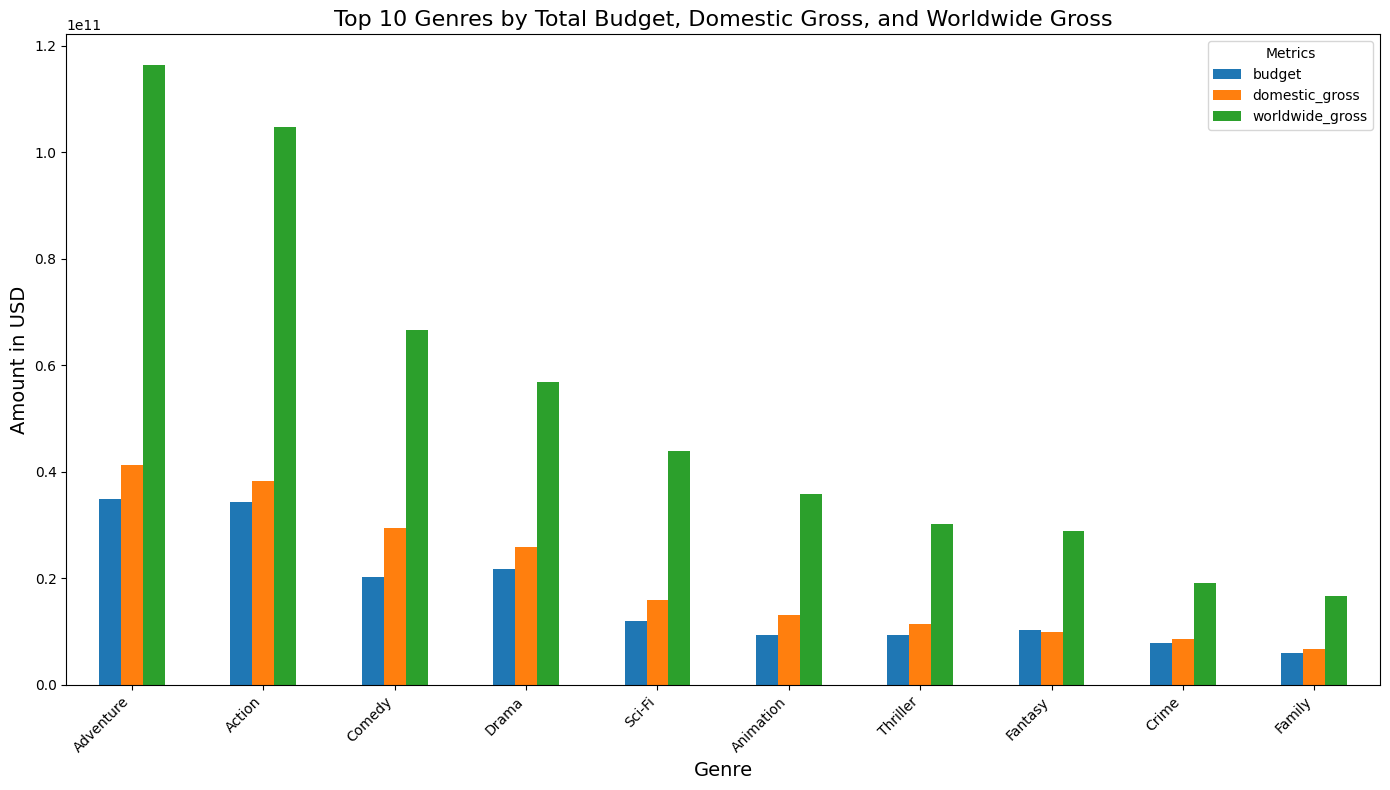

In [ ]:
#winny

# Split genres and create a new DataFrame with individual genres
genre_split = merged_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_df = merged_df.drop(columns='genres').join(genre_split)

# Aggregate by genre for budget, domestic gross, and worldwide gross
genre_agg = genre_df.groupby('genre')[['budget', 'domestic_gross', 'worldwide_gross']].sum()

# Select the top 10 genres based on worldwide_gross
top_10_genres = genre_agg.nlargest(10, 'worldwide_gross')

fig, ax = plt.subplots(figsize=(14, 8))

top_10_genres.plot(kind='bar', ax=ax)

# Titles and labels
ax.set_title('Top 10 Genres by Total Budget, Domestic Gross, and Worldwide Gross', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Amount in USD', fontsize=14)
ax.legend(title='Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



- In terms of domestic gross, worldwide gross, and budget, the leading genre is `Adventure`, while `Family` ranks lowest among the top 10 genres.

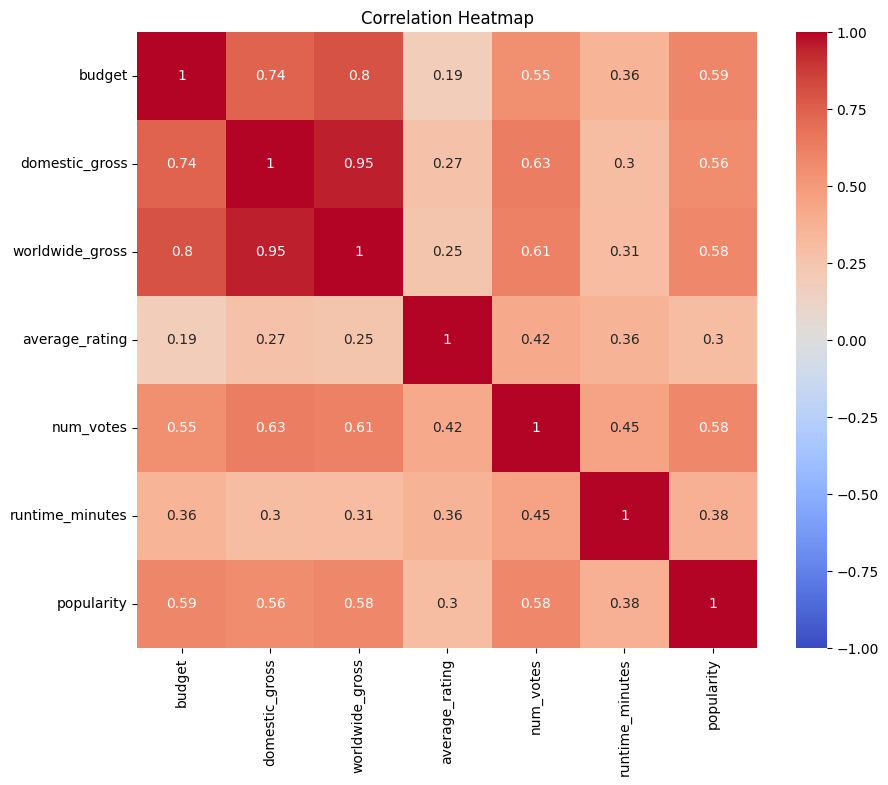

In [ ]:
#winny
# Select only the numeric columns
numeric_cols = ['budget', 'domestic_gross', 'worldwide_gross', 'average_rating', 'num_votes', 'runtime_minutes', 'popularity']

# Ensure the columns exist in the DataFrame
numeric_df = merged_df[numeric_cols]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

- `Budget and worldwide_gross` has correlation of `0.802889` This indicates a strong positive correlation, meaning higher budgets tend to be associated with higher worldwide gross.
- `Domestic_gross and worldwide_gross` also has strong corrleation of `0.947102` which shows very high correlation suggests that movies that perform well domestically also perform well worldwide.
- `num_votes and popularity` also has moderate correlation of `0.584154` indicating a strong positive correlation, suggesting that movies with more votes tend to be more popular.

- `Budget and domestic_gross`  has a high corrleation of `0.739963`
- Finally `budget and popularity` has moderate correlation of `0.591660` showcasing a higher-budget movies tend to be more popular.
- On the other side `average_rating` has lower correlations with most other variables, indicating that the average rating is less influenced by budget, gross, etc.
- From here the best potential predictors for the model are
1. `budget`
2. `num_votes`
2. `runtime_minutes`
4. `popularity`  
- Since  `domestic_gross` and `worldwide_gross` are highly correlated, we will choose the latter as target varible.

## Linear regression Model

In [ ]:

# Select only the relevant numeric columns
numeric_columns = ['budget', 'num_votes', 'runtime_minutes', 'popularity']
data = merged_df[numeric_columns + ['worldwide_gross']].dropna()

# Define features (X) and target variable (y)
X = data[numeric_columns]
y = data['worldwide_gross']

# Add constant term for intercept
X_with_const = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X_with_const).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1006.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:55:07   Log-Likelihood:                -35877.
No. Observations:                1788   AIC:                         7.176e+04
Df Residuals:                    1783   BIC:                         7.179e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.625e+07   1.87e+07     

- `R-squared = 0.693` means that approximately `69.3%` of the variance in the target variable `worldwide_gross` can be explained by the predictors in the model. This indicates a good fit, showing that the model explains a substantial portion of the variability in `worldwide_gross.`
- `Intercept`: The p-value of `0.053` indicates that the intercept is not close to being statistically significant at the 5% level hence not significant in this context.

- `Budget`: The p-value of `0.000` shows that budget is a highly significant predictor of worldwide_gross, with a strong positive effect.

- `Num_votes:` The p-value of `0.000` indicates that num_votes is a highly significant predictor of worldwide_gross, with a strong positive effect.

- `Runtime_minutes`: The p-value of `0.000`   signifies that runtime_minutes is a highly significant predictor of worldwide_gross, with a strong negative effect.

- `Popularity`: The p-value of `0.000` shows that popularity is a highly significant predictor of worldwide_gross, with a strong positive effect.

## Assumptions of linear regression
### 1. Linearity

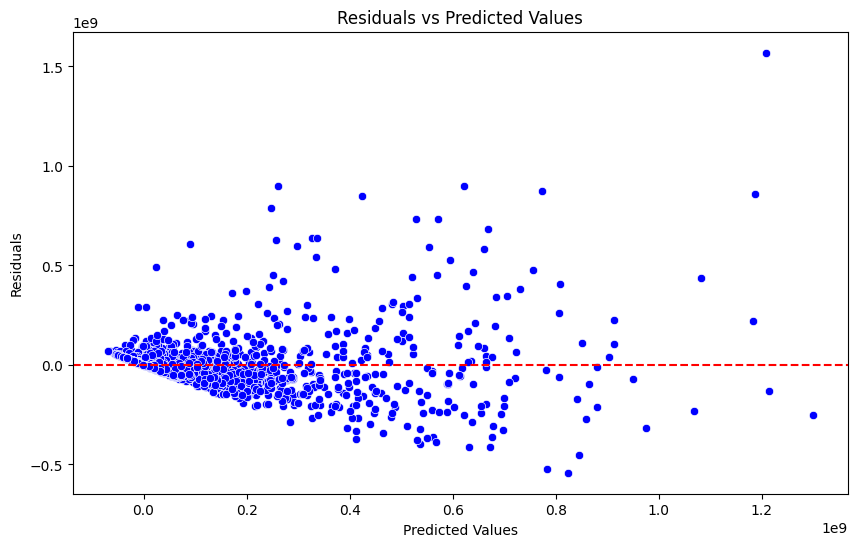

In [ ]:

# Get model predictions and residuals
predictions = model.predict(X_with_const)
residuals = y - predictions# Ploting Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 2. Normality of Errors

<Figure size 1000x600 with 0 Axes>

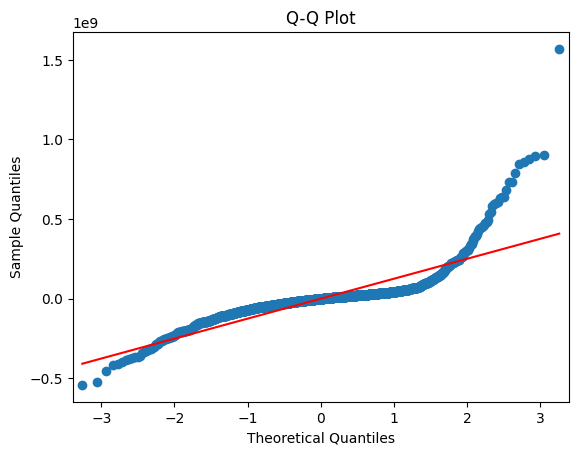

Shapiro-Wilk test statistic: 0.717578113079071, p-value: 0.0


In [ ]:
# Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

###  3. Homoscedasticity

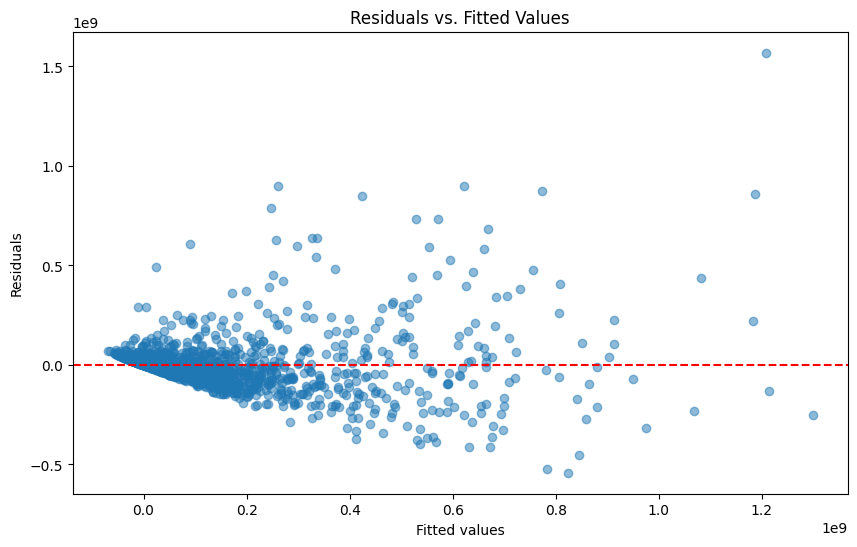

Breusch-Pagan test statistic: 325.46843584188315, p-value: 3.463909922307965e-69


In [ ]:
# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

# Calculate Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_const)
print(f'Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}')


### 4. Independence of Errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')


Durbin-Watson statistic: 1.392773889658727


# Conclusions

#Limitations

# Reccomendations